# Datos bursátiles de 15 años: NVDA, AAPL, MSFT, GOOGL y AMZN #

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("marianadeem755/stock-market-data")

print("Path to dataset files:", path)

c:\Users\Alejo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Alejo\.cache\kagglehub\datasets\marianadeem755\stock-market-data\versions\1


## Modelo completo ##

In [3]:
import pandas as pd
import os

print("Archivos descargados:")
print(os.listdir(path))

df = pd.read_csv(os.path.join(path, "15 Years Stock Data of NVDA AAPL MSFT GOOGL and AMZN.csv"))  # <- cambia el nombre si es necesario
df.head()


Archivos descargados:
['15 Years Stock Data of NVDA AAPL MSFT GOOGL and AMZN.csv']


,Date,Close_AAPL,Close_AMZN,Close_GOOGL,Close_MSFT,Close_NVDA,High_AAPL,High_AMZN,High_GOOGL,High_MSFT,...,Open_AAPL,Open_AMZN,Open_GOOGL,Open_MSFT,Open_NVDA,Volume_AAPL,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_NVDA
0,2010-01-04,6.440330,6.6950,15.609805,23.254051,0.423884,6.455075,6.8305,15.678546,23.366752,...,6.422875,6.8125,15.614786,23.006108,0.424342,493729600,151998000,78169752,38409100,800204000
1,2010-01-05,6.451465,6.7345,15.541064,23.261557,0.430073,6.487878,6.7740,15.636953,23.366746,...,6.458086,6.6715,15.620515,23.178910,0.422279,601904800,177038000,120067812,49749600,728648000
2,2010-01-06,6.348847,6.6125,15.149294,23.118809,0.432824,6.477046,6.7365,15.587638,23.351725,...,6.451466,6.7300,15.587638,23.201455,0.429844,552160000,143576000,158988852,58182400,649168000
3,2010-01-07,6.337109,6.5000,14.796624,22.878376,0.424342,6.379842,6.6160,15.192630,23.066212,...,6.372319,6.6005,15.177685,23.013616,0.430532,477131200,220604000,256315428,50559700,547792000
4,2010-01-08,6.379242,6.6760,14.993881,23.036165,0.425259,6.379844,6.6840,15.024515,23.201460,...,6.328685,6.5280,14.744323,22.750656,0.420903,447610800,196610000,188783028,51197400,478168000


In [5]:
# Verificación de la existencia de valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

print(f"Dimensiones del dataset: {df.shape}")

Valores faltantes por columna:
Date            0
Close_AAPL      0
Close_AMZN      0
Close_GOOGL     0
Close_MSFT      0
Close_NVDA      0
High_AAPL       0
High_AMZN       0
High_GOOGL      0
High_MSFT       0
High_NVDA       0
Low_AAPL        0
Low_AMZN        0
Low_GOOGL       0
Low_MSFT        0
Low_NVDA        0
Open_AAPL       0
Open_AMZN       0
Open_GOOGL      0
Open_MSFT       0
Open_NVDA       0
Volume_AAPL     0
Volume_AMZN     0
Volume_GOOGL    0
Volume_MSFT     0
Volume_NVDA     0
dtype: int64
Dimensiones del dataset: (3774, 26)


### Saleccionamos 10 variables relevantes para el análisis ###

In [6]:
selected_cols = [
    'Close_AAPL', 'Close_AMZN', 'Close_GOOGL', 'Close_MSFT', 'Close_NVDA',
    'Volume_AAPL', 'Volume_AMZN', 'Volume_GOOGL', 'Volume_MSFT', 'Volume_NVDA'
]

df_selected = df[selected_cols]


In [7]:
# Se estandarizan las variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)


## Modelo de PCA ##

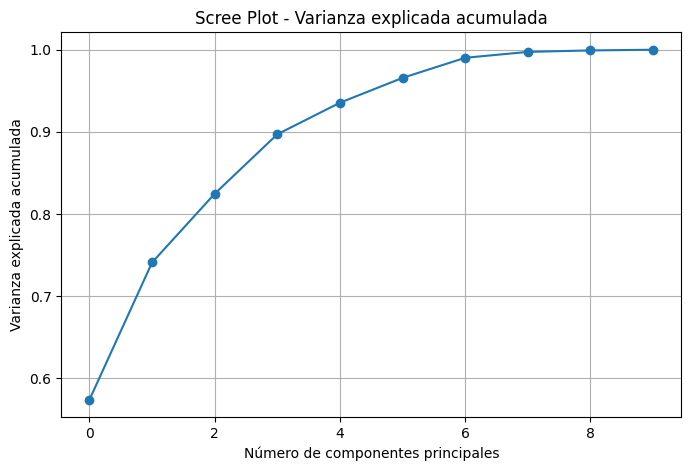

In [8]:
# Aplicar PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Scree Plot - Varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()


In [9]:
# Reducimos a dos componentes principales
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

df_pca_2 = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
df_pca_2.head()


,PC1,PC2
0,-2.544806,0.518618
1,-3.133857,1.361258
2,-3.238187,1.453788
3,-3.833212,2.438466
4,-3.299124,1.590989


C:\Users\Alejo\AppData\Local\Temp\ipykernel_26000\2985192190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


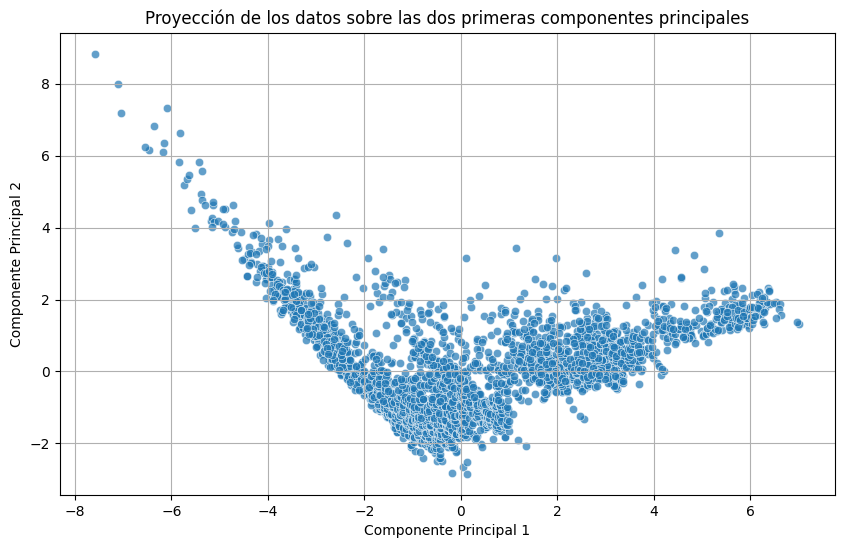

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    data=df_pca_2,
    palette='viridis',
    alpha=0.7
)
plt.title('Proyección de los datos sobre las dos primeras componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


## Modelo de exclusión por matriz de correlación ##

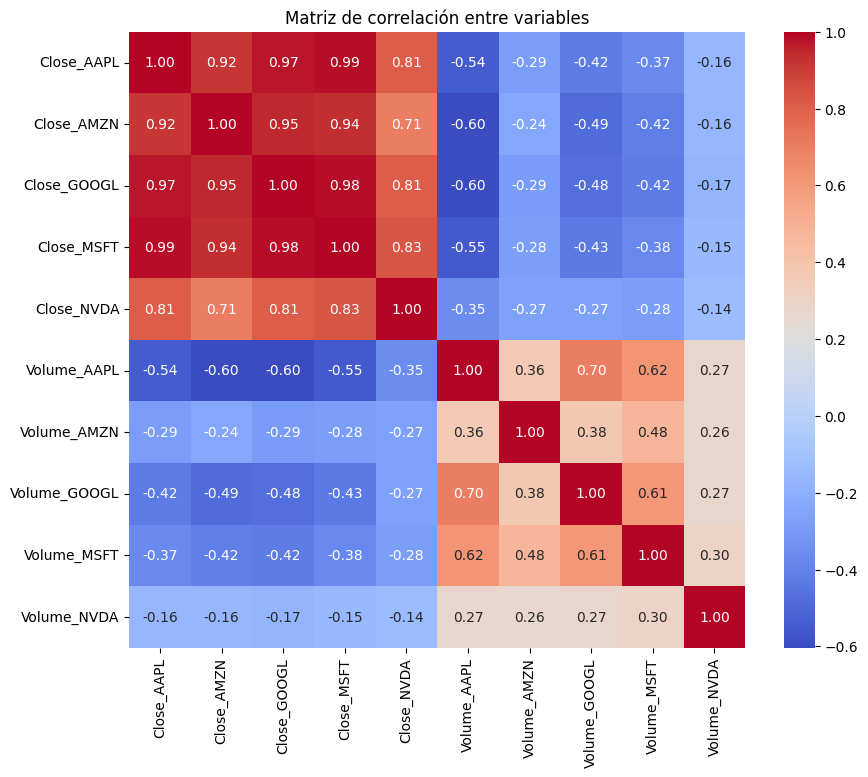

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
corr_matrix = df_selected.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de correlación entre variables')
plt.show()


In [12]:
# Encuentra pares con correlación alta
threshold = 0.95
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Variables a eliminar
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]
print("Variables eliminadas por alta correlación:", to_drop)

# Dataset reducido
df_reduced = df_selected.drop(columns=to_drop)


Variables eliminadas por alta correlación: ['Close_GOOGL', 'Close_MSFT']


In [13]:
# Ver las dimensiones del nuevo dataset
print(f"Dimensiones del dataset reducido: {df_reduced.shape}")

# Ver las primeras filas del dataset reducido
df_reduced.head()


Dimensiones del dataset reducido: (3774, 8)


,Close_AAPL,Close_AMZN,Close_NVDA,Volume_AAPL,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_NVDA
0,6.440330,6.6950,0.423884,493729600,151998000,78169752,38409100,800204000
1,6.451465,6.7345,0.430073,601904800,177038000,120067812,49749600,728648000
2,6.348847,6.6125,0.432824,552160000,143576000,158988852,58182400,649168000
3,6.337109,6.5000,0.424342,477131200,220604000,256315428,50559700,547792000
4,6.379242,6.6760,0.425259,447610800,196610000,188783028,51197400,478168000


In [14]:
print("Variables restantes en el dataset reducido:")
print(df_reduced.columns.tolist())


Variables restantes en el dataset reducido:
['Close_AAPL', 'Close_AMZN', 'Close_NVDA', 'Volume_AAPL', 'Volume_AMZN', 'Volume_GOOGL', 'Volume_MSFT', 'Volume_NVDA']


### Se utilizó el análisis de correlación de Pearson para identificar variables altamente redundantes dentro del conjunto de datos original. El criterio aplicado fue el siguiente: ###

- Se calculó la matriz de correlación entre todas las variables numéricas.
- Se estableció un umbral de correlación de 0.95 para considerar dos variables como altamente correlacionadas.
- Cuando dos variables superaban este umbral, se eliminó una de ellas para evitar duplicidad de información y reducir la multicolinealidad.

In [15]:
from sklearn.preprocessing import StandardScaler

# Dataset reducido por correlación (ya creado en df_reduced)
scaler_reduced = StandardScaler()
X_reduced_scaled = scaler_reduced.fit_transform(df_reduced)


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def evaluate_kmeans(X, title):
    inertia = []
    silhouette = []
    K_range = range(2, 7)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        inertia.append(kmeans.inertia_)
        silhouette.append(silhouette_score(X, labels))

    # Gráfico del método del codo
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(K_range, inertia, marker='o')
    plt.title(f'Método del codo - {title}')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Inercia')

    # Gráfico del silhouette score
    plt.subplot(1, 2, 2)
    plt.plot(K_range, silhouette, marker='o', color='green')
    plt.title(f'Silhouette Score - {title}')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()


## Comparativa de modelos ##

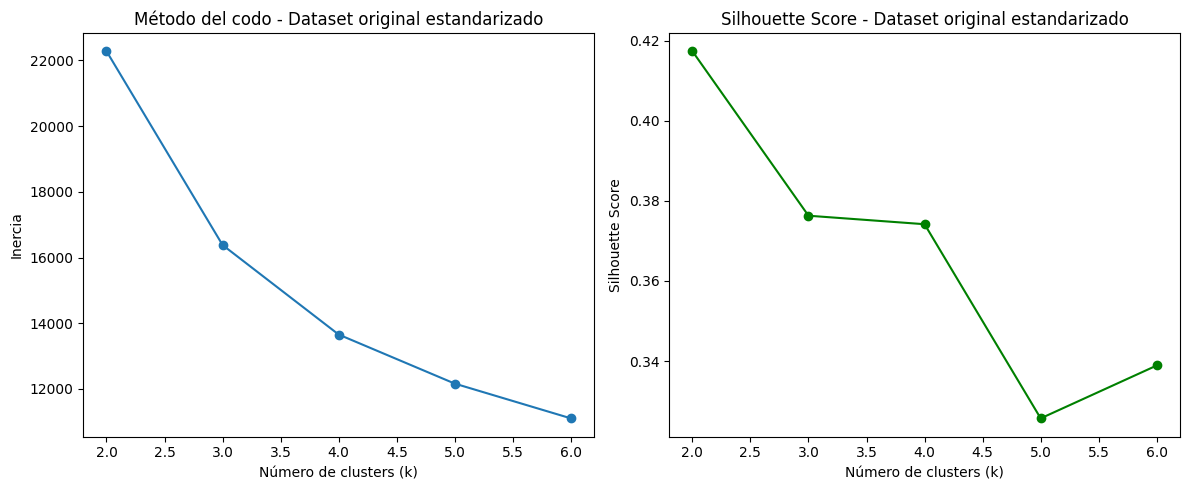

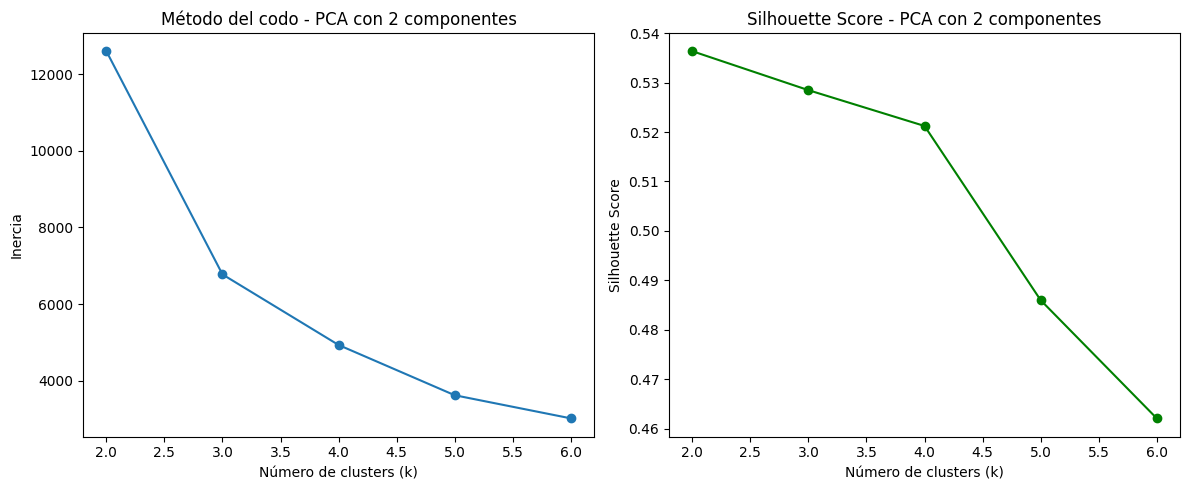

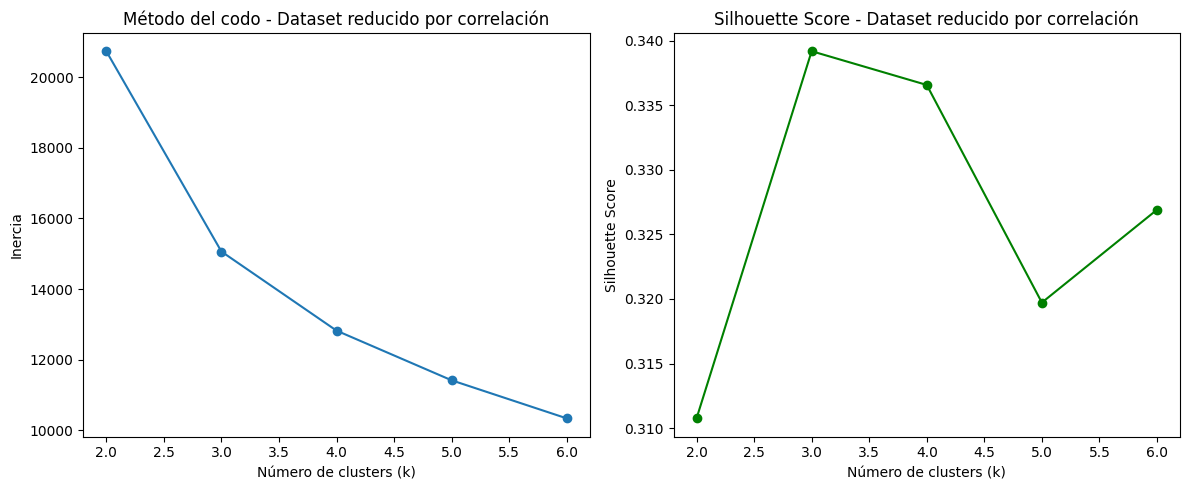

In [17]:
# 1. Dataset original estandarizado
evaluate_kmeans(X_scaled, "Dataset original estandarizado")

# 2. Dataset reducido a 2 componentes principales
evaluate_kmeans(X_pca_2, "PCA con 2 componentes")

# 3. Dataset reducido por correlación
evaluate_kmeans(X_reduced_scaled, "Dataset reducido por correlación")